In [14]:
import sumolib
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import random

import torch
import torch_geometric
import torch_geometric.data as Data
import torch_geometric.utils as pyg_utils

import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import numpy as np
import json
import sys
import import_ipynb

import copy

%run ../Codes/Data_handling.ipynb
%run ../Codes/Data_visualization.ipynb
%run ../Codes/Model.ipynb
%run ../Codes/Analysis.ipynb

326
329
50


In [2]:
G1 = read_sumo_net1('../Data/s_gyor.net.xml') # type: ignore
G2 = add_edge_features_from_xml(G1,'../Data/gyor_forg_15_min.xml',"10800.00")
with open('../Codes/dimensions.json', 'r') as file:
    edge_dims = json.load(file)

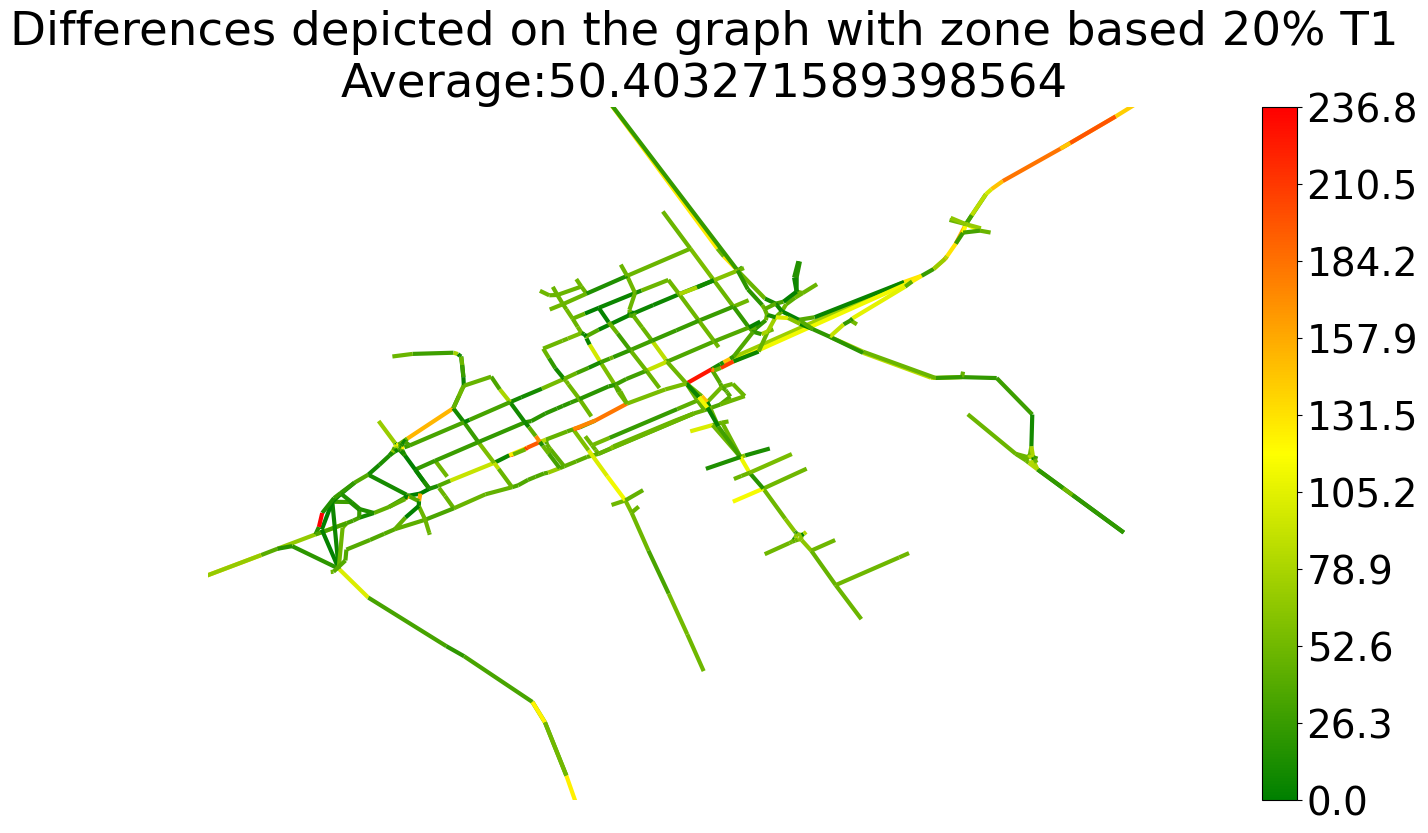

C:\Users\nemes\AppData\Local\Temp\ipykernel_18376\3839311606.py:2: RuntimeWarning: invalid value encountered in sqrt
  geh = np.sqrt(2*np.power((float(M) - float(C)), 2) / (float(M) + float(C)))


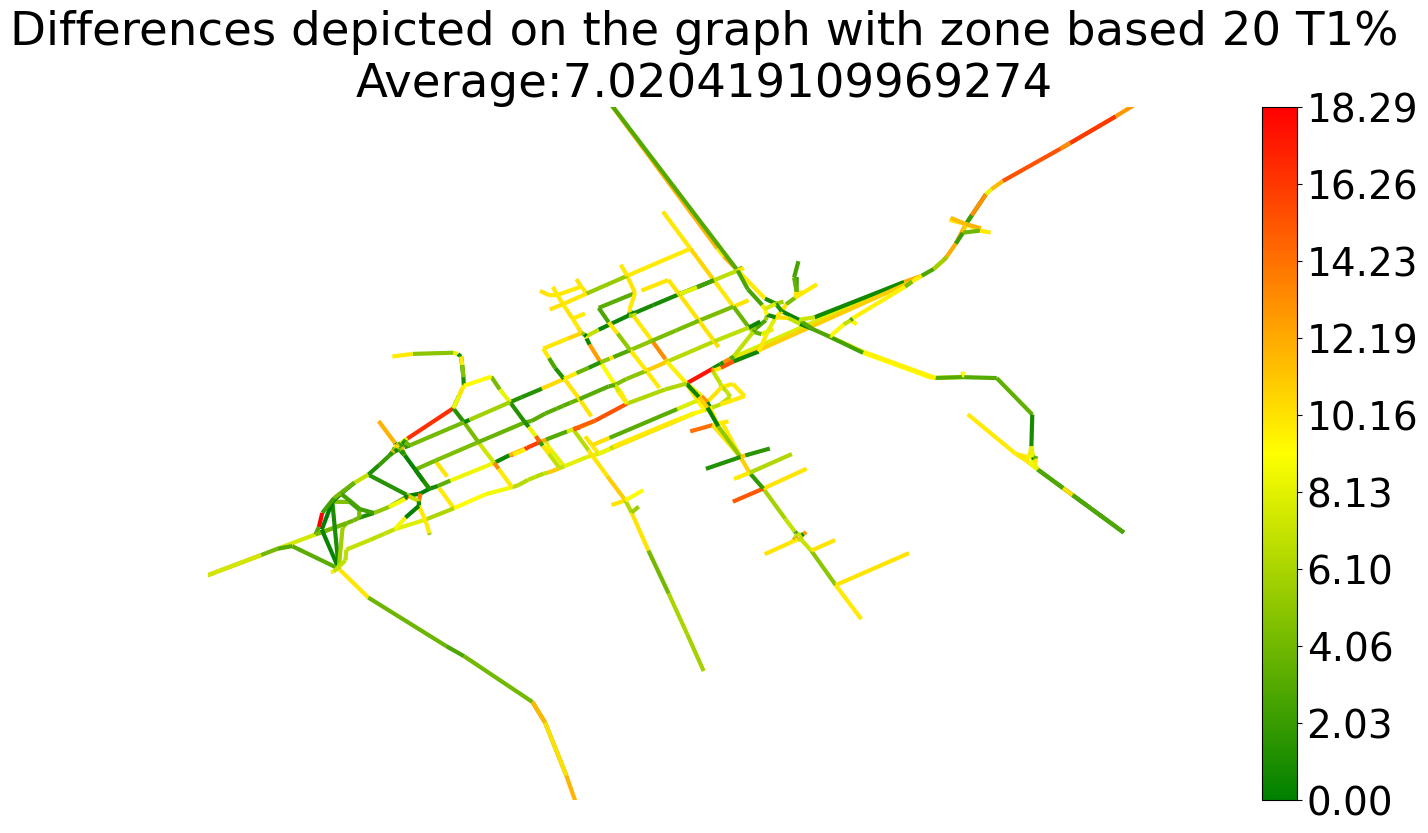

In [31]:
%run ../Codes/Data_visualization.ipynb
with open('../forecasting/edges_to_hide0.8_t1_smart_5_v1.json', 'r') as file:
    edges_to_hide = json.load(file)

data_predict = torch.load('../generate/generated_files/data_predict_backup.pth')
data_predict_copy = copy.deepcopy(data_predict)
random_numbers = random.sample(range(len(data_predict)), int(len(data_predict)*0.3))
data_predict_test = [data_predict_copy[i] for i in random_numbers]
data_predict_train = [data_predict_copy[i] for i in range(len(data_predict_copy)) if i not in random_numbers]
prepared_training_data, prepared_training_data_hidden, prepared_test_data, prepared_test_data_hidden = data_preparation_for_forecasting(data_predict_train,data_predict_test, edges_to_hide, True)

model2 = GNN(edge_dims[0], edge_dims[1], edge_dims[2], edge_dims[3], edge_dims[4], edge_dims[5], edge_dims[6], edge_dims[7], edge_dims[8])
model2.load_state_dict(torch.load('../forecasting/gnn_model_ces_0.8_t1_smart_5_v1.json'))
output = model2(prepared_training_data_hidden[2][2].edge_attr, prepared_training_data_hidden[2][2].edge_index)
maxdif_s_30 = plot_graph_weight_forecast(G1, output, edges_to_hide,prepared_training_data[2][2]," zone based 20% T1" )
maxdif_s_30_GEH = plot_graph_weight_forecast_GEH(G1, output, edges_to_hide,prepared_training_data[2][2], " zone based 20 T1%" )

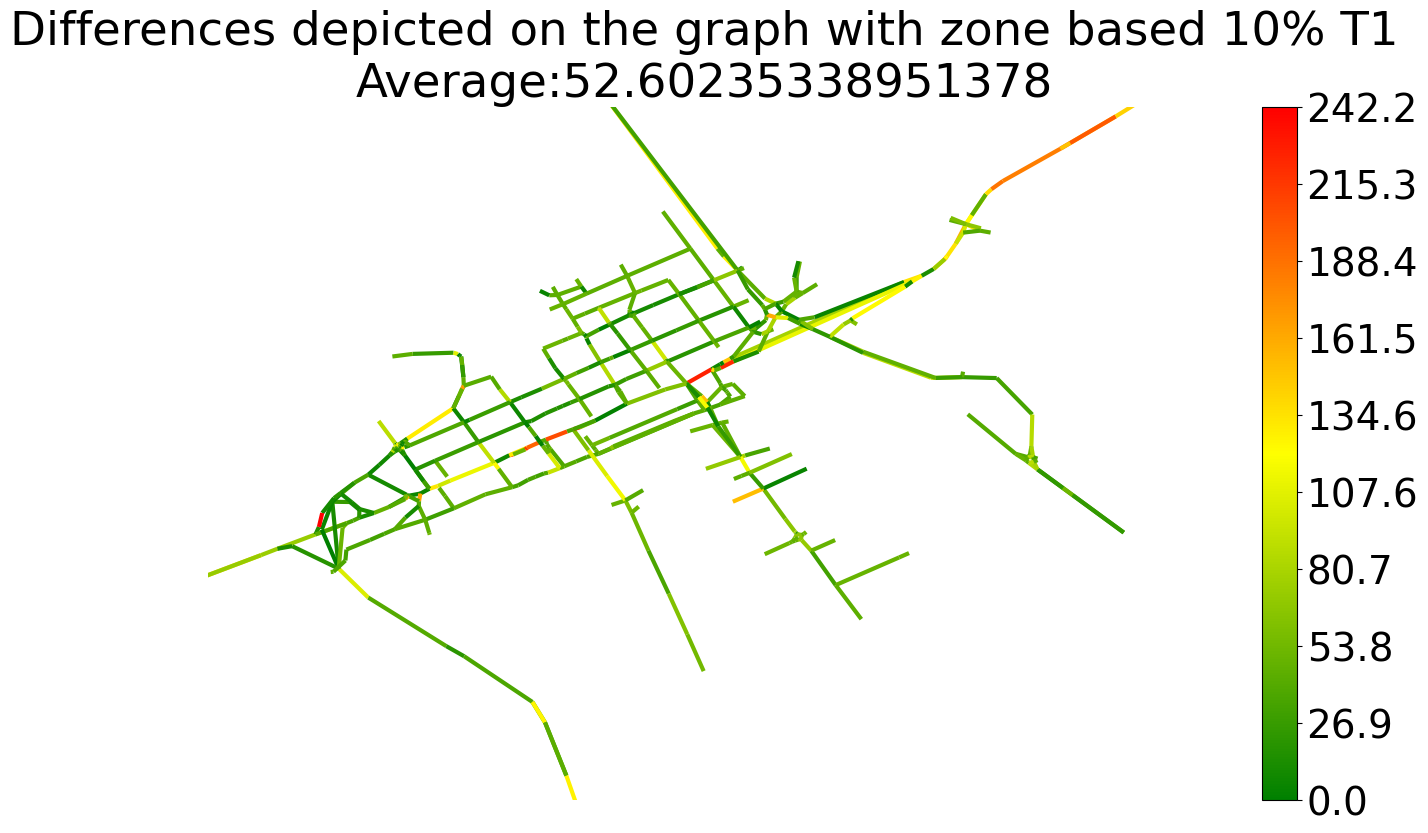

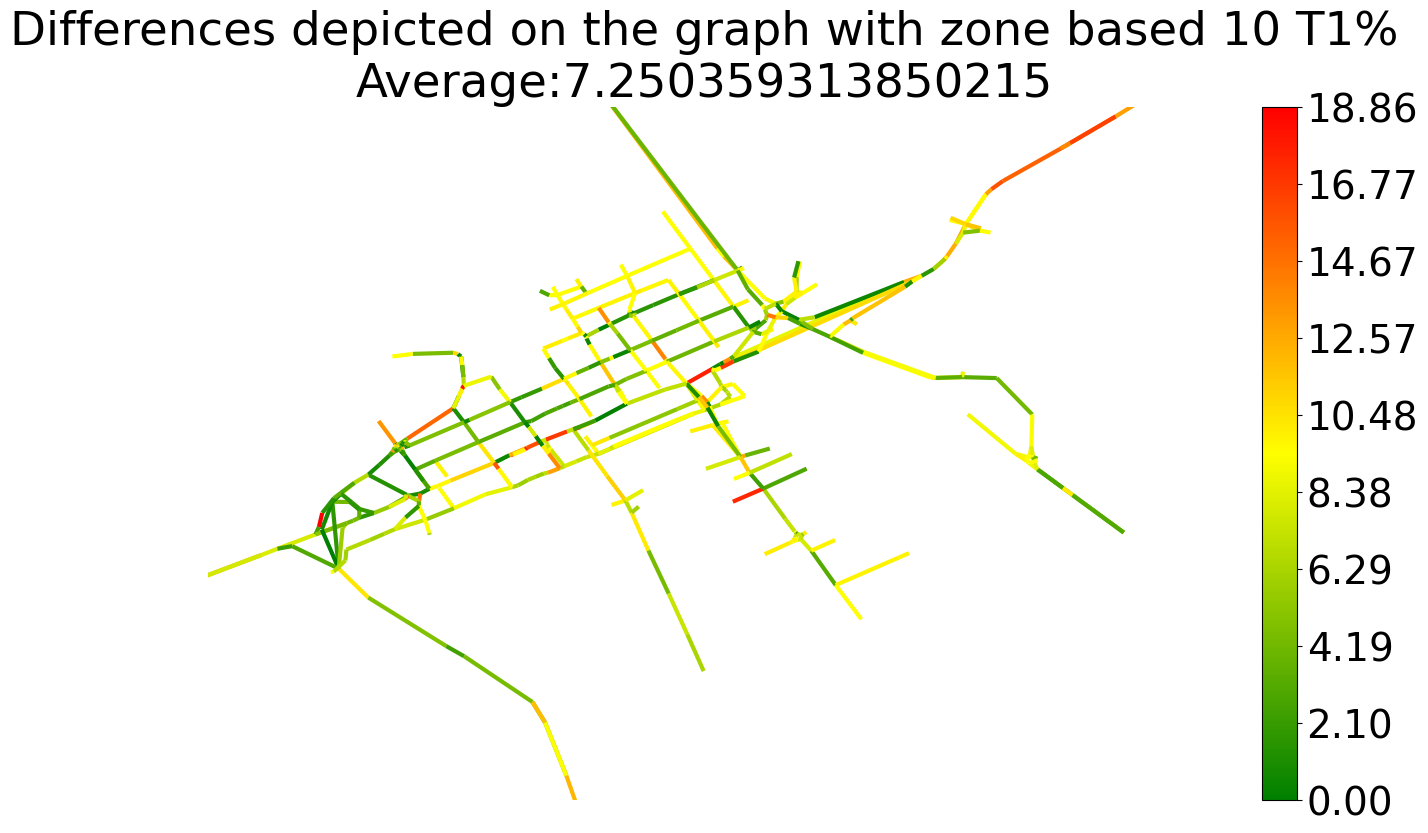

In [34]:
%run ../Codes/Data_visualization.ipynb
with open('../forecasting/edges_to_hide0.9_t1_smart_5_v1.json', 'r') as file:
    edges_to_hide = json.load(file)

data_predict = torch.load('../generate/generated_files/data_predict_backup.pth')
data_predict_copy = copy.deepcopy(data_predict)
random_numbers = random.sample(range(len(data_predict)), int(len(data_predict)*0.3))
data_predict_test = [data_predict_copy[i] for i in random_numbers]
data_predict_train = [data_predict_copy[i] for i in range(len(data_predict_copy)) if i not in random_numbers]
prepared_training_data, prepared_training_data_hidden, prepared_test_data, prepared_test_data_hidden = data_preparation_for_forecasting(data_predict_train,data_predict_test, edges_to_hide, True)

model2 = GNN(edge_dims[0], edge_dims[1], edge_dims[2], edge_dims[3], edge_dims[4], edge_dims[5], edge_dims[6], edge_dims[7], edge_dims[8])
model2.load_state_dict(torch.load('../forecasting/gnn_model_ces_0.9_t1_smart_5_v1.json'))
output = model2(prepared_training_data_hidden[2][2].edge_attr, prepared_training_data_hidden[2][2].edge_index)
maxdif_s_30 = plot_graph_weight_forecast(G1, output, edges_to_hide,prepared_training_data[2][2]," zone based 10% T1" )
maxdif_s_30_GEH = plot_graph_weight_forecast_GEH(G1, output, edges_to_hide,prepared_training_data[2][2], " zone based 10 T1%" )

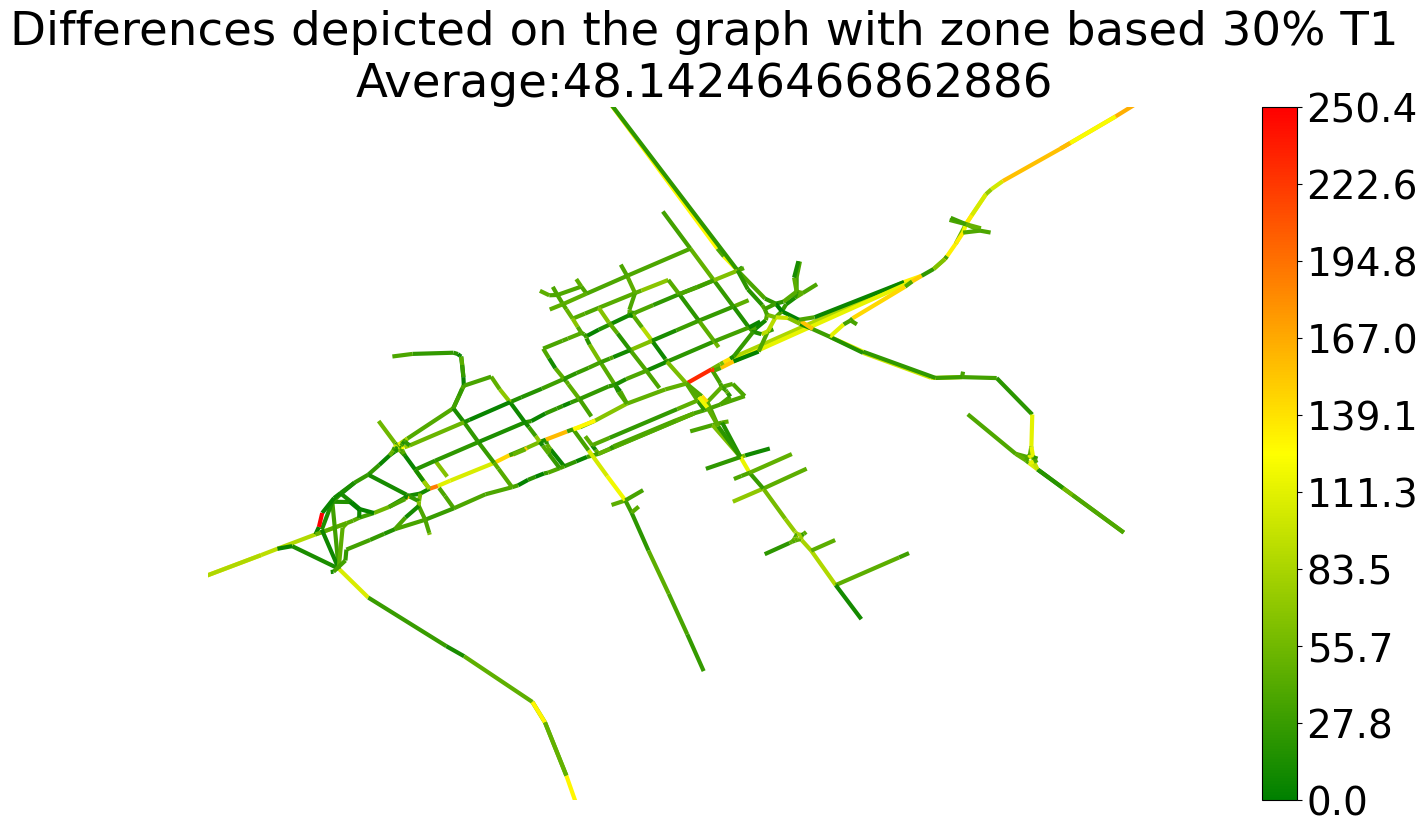

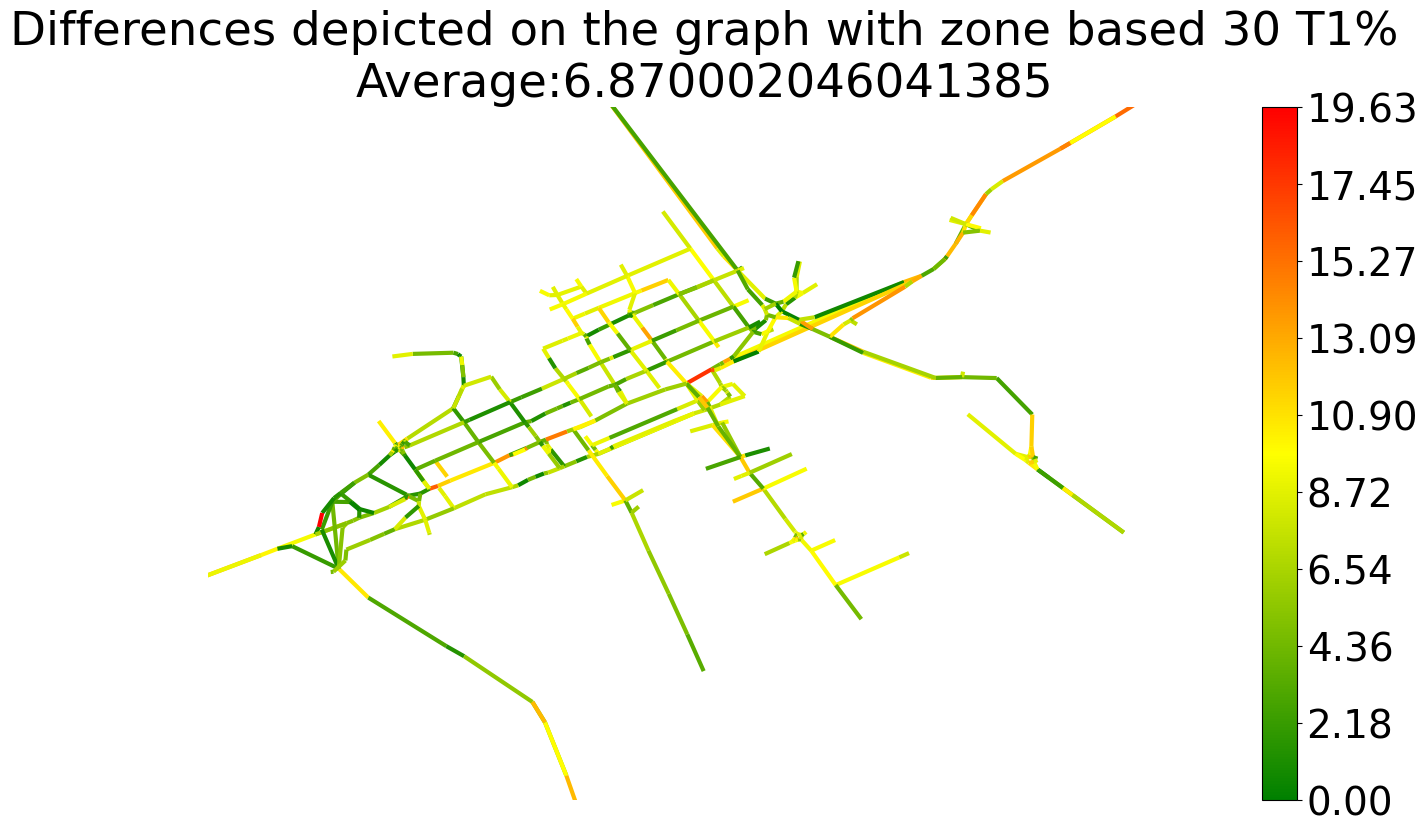

In [35]:
%run ../Codes/Data_visualization.ipynb
with open('../forecasting/edges_to_hide0.7_t1_smart_5_v1.json', 'r') as file:
    edges_to_hide = json.load(file)

data_predict = torch.load('../generate/generated_files/data_predict_backup.pth')
data_predict_copy = copy.deepcopy(data_predict)
random_numbers = random.sample(range(len(data_predict)), int(len(data_predict)*0.3))
data_predict_test = [data_predict_copy[i] for i in random_numbers]
data_predict_train = [data_predict_copy[i] for i in range(len(data_predict_copy)) if i not in random_numbers]
prepared_training_data, prepared_training_data_hidden, prepared_test_data, prepared_test_data_hidden = data_preparation_for_forecasting(data_predict_train,data_predict_test, edges_to_hide, True)

model2 = GNN(edge_dims[0], edge_dims[1], edge_dims[2], edge_dims[3], edge_dims[4], edge_dims[5], edge_dims[6], edge_dims[7], edge_dims[8])
model2.load_state_dict(torch.load('../forecasting/gnn_model_ces_0.7_t1_smart_5_v1.json'))
output = model2(prepared_training_data_hidden[2][2].edge_attr, prepared_training_data_hidden[2][2].edge_index)
maxdif_s_30 = plot_graph_weight_forecast(G1, output, edges_to_hide,prepared_training_data[2][2]," zone based 30% T1" )
maxdif_s_30_GEH = plot_graph_weight_forecast_GEH(G1, output, edges_to_hide,prepared_training_data[2][2], " zone based 30 T1%" )

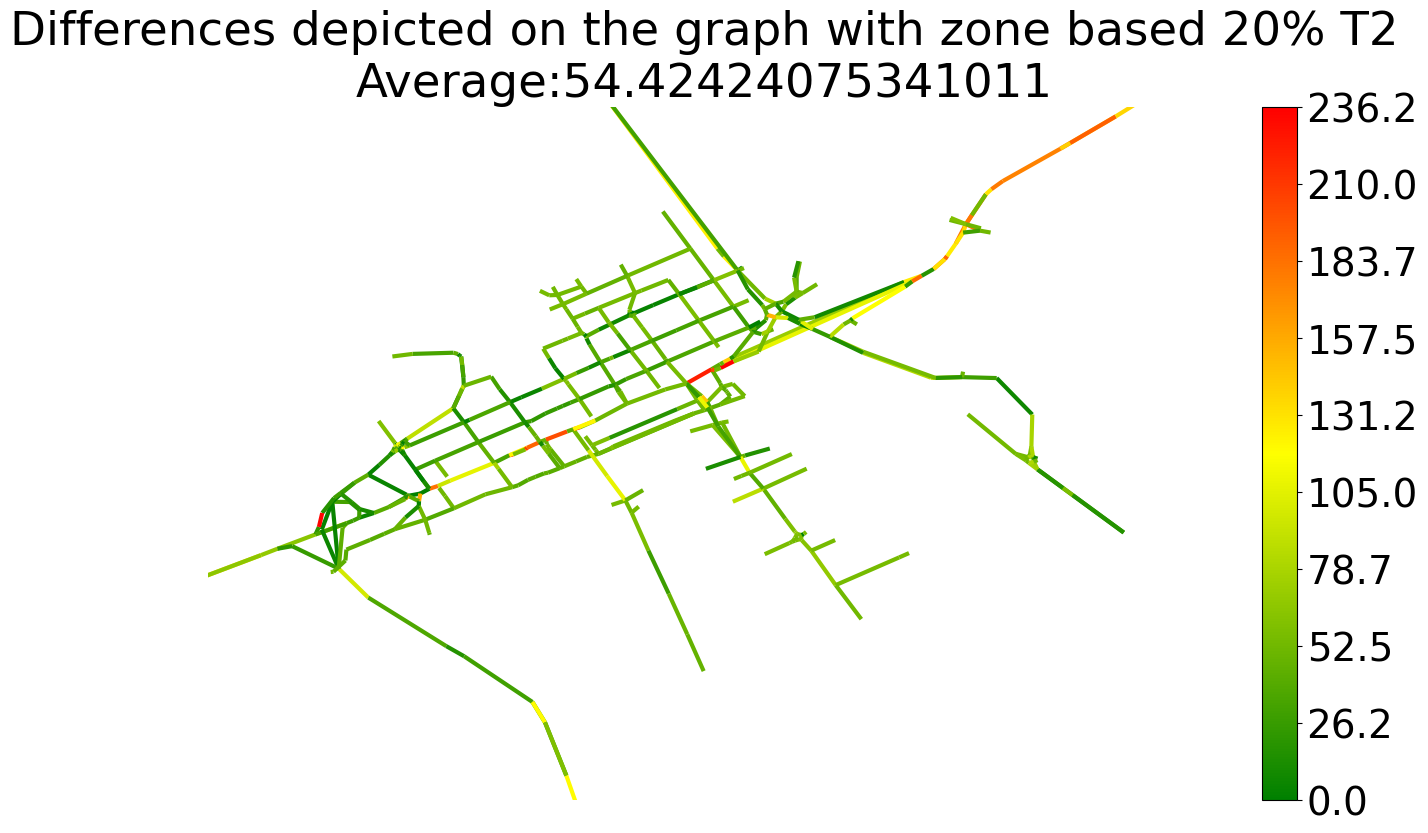

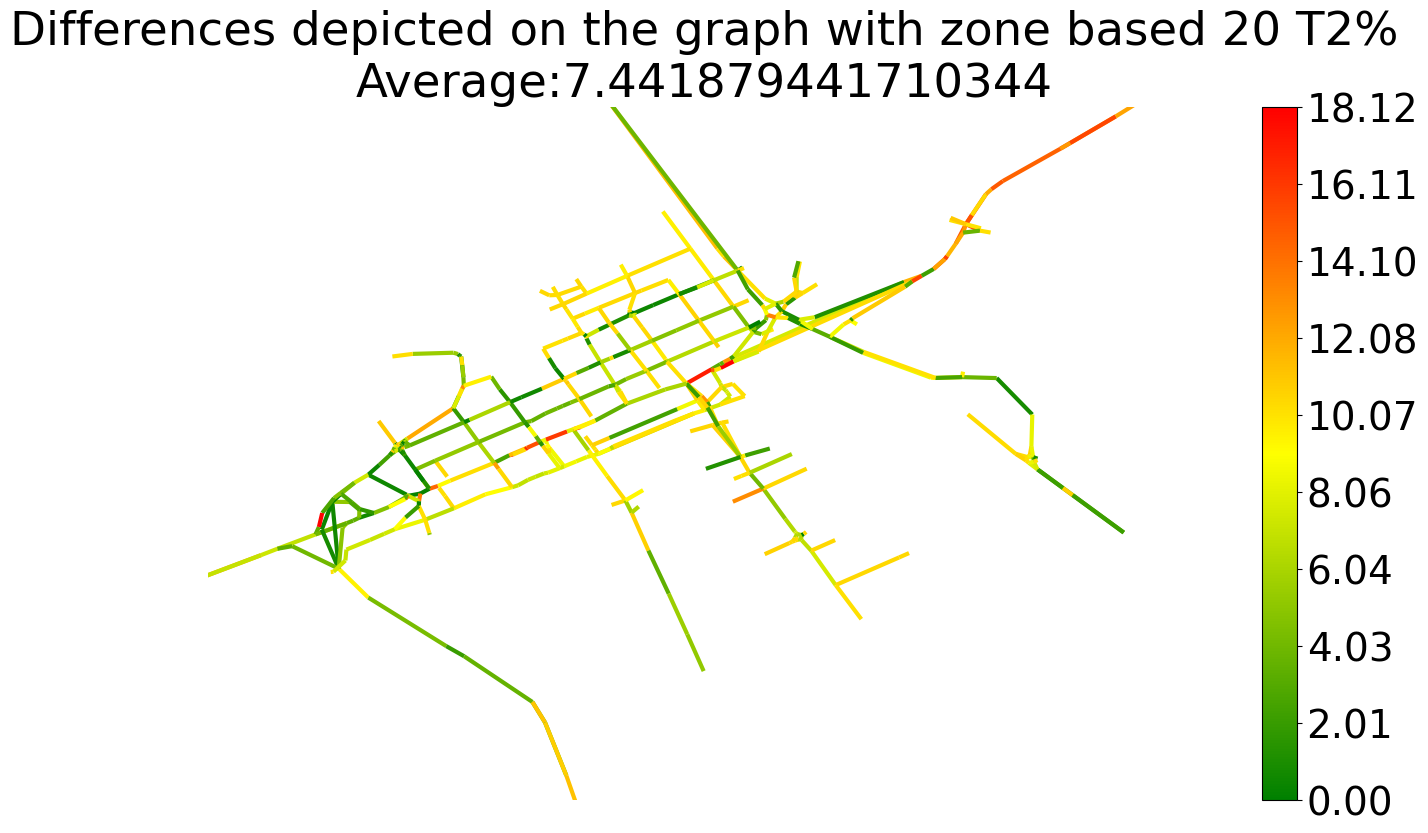

In [37]:
%run ../Codes/Data_visualization.ipynb
with open('../forecasting/edges_to_hide0.8_t2_smart_5_v5.json', 'r') as file:
    edges_to_hide = json.load(file)

data_predict = torch.load('../generate/generated_files/data_predict_backup.pth')
data_predict_copy = copy.deepcopy(data_predict)
random_numbers = random.sample(range(len(data_predict)), int(len(data_predict)*0.3))
data_predict_test = [data_predict_copy[i] for i in random_numbers]
data_predict_train = [data_predict_copy[i] for i in range(len(data_predict_copy)) if i not in random_numbers]
prepared_training_data, prepared_training_data_hidden, prepared_test_data, prepared_test_data_hidden = data_preparation_for_forecasting(data_predict_train,data_predict_test, edges_to_hide, True)

model2 = GNN(edge_dims[0], edge_dims[1], edge_dims[2], edge_dims[3], edge_dims[4], edge_dims[5], edge_dims[6], edge_dims[7], edge_dims[8])
model2.load_state_dict(torch.load('../forecasting/gnn_model_ces_0.8_t2_smart_5_v5.json'))
output = model2(prepared_training_data_hidden[2][2].edge_attr, prepared_training_data_hidden[2][2].edge_index)
maxdif_s_30 = plot_graph_weight_forecast(G1, output, edges_to_hide,prepared_training_data[2][2]," zone based 20% T2" )
maxdif_s_30_GEH = plot_graph_weight_forecast_GEH(G1, output, edges_to_hide,prepared_training_data[2][2], " zone based 20 T2%" )

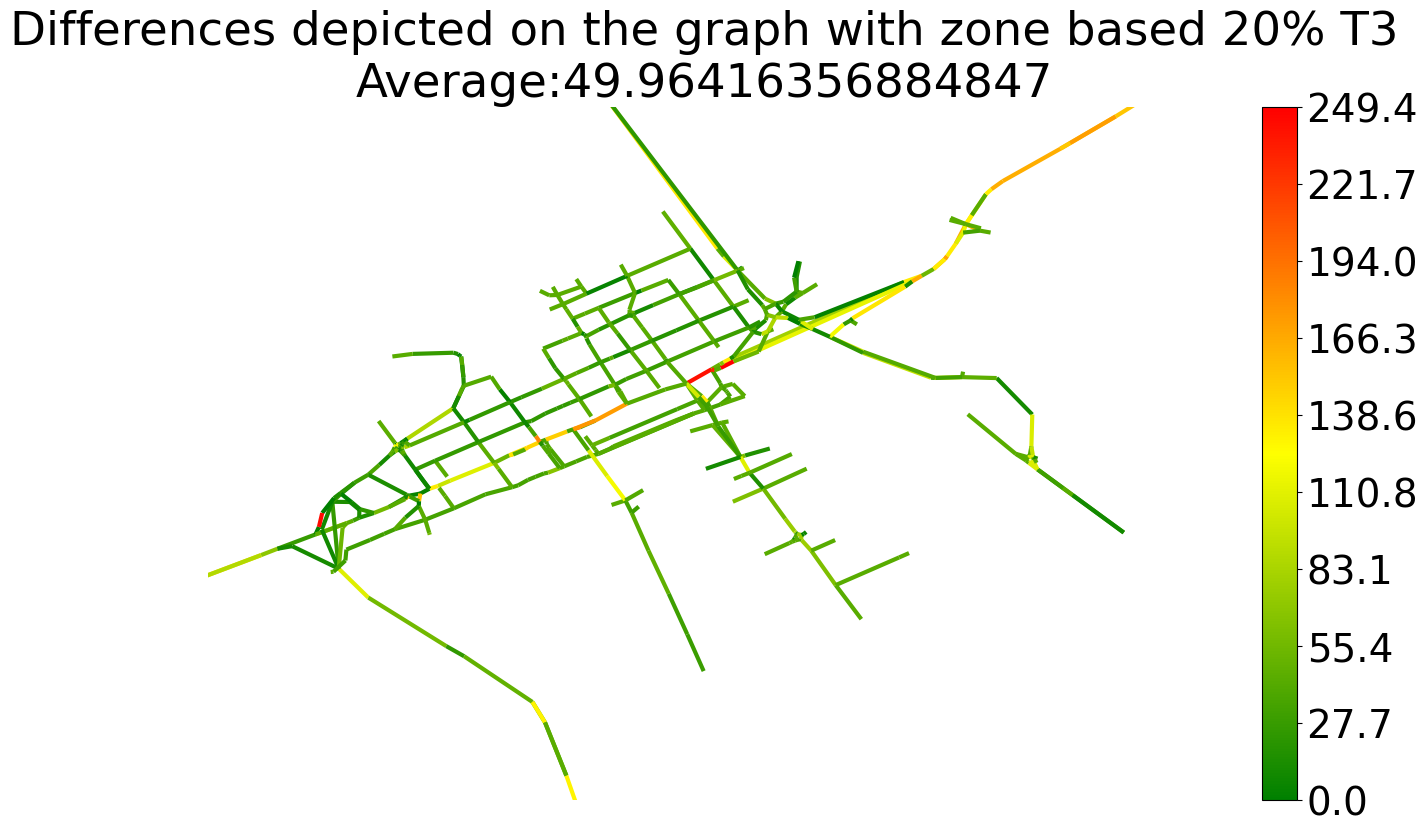

C:\Users\nemes\AppData\Local\Temp\ipykernel_18376\3839311606.py:2: RuntimeWarning: invalid value encountered in sqrt
  geh = np.sqrt(2*np.power((float(M) - float(C)), 2) / (float(M) + float(C)))


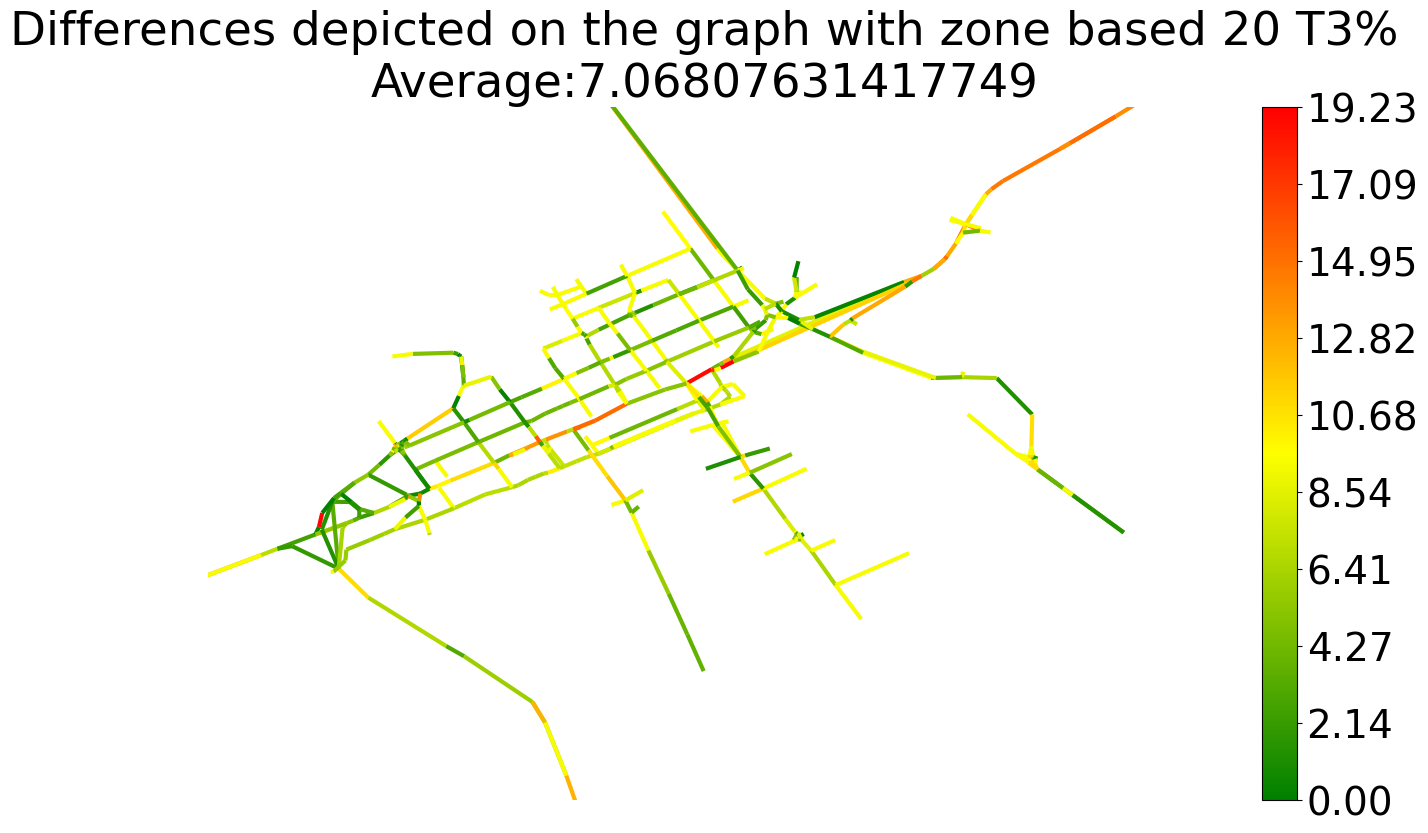

In [38]:
%run ../Codes/Data_visualization.ipynb
with open('../forecasting/edges_to_hide0.8_t3_smart_5_v1.json', 'r') as file:
    edges_to_hide = json.load(file)

data_predict = torch.load('../generate/generated_files/data_predict_backup.pth')
data_predict_copy = copy.deepcopy(data_predict)
random_numbers = random.sample(range(len(data_predict)), int(len(data_predict)*0.3))
data_predict_test = [data_predict_copy[i] for i in random_numbers]
data_predict_train = [data_predict_copy[i] for i in range(len(data_predict_copy)) if i not in random_numbers]
prepared_training_data, prepared_training_data_hidden, prepared_test_data, prepared_test_data_hidden = data_preparation_for_forecasting(data_predict_train,data_predict_test, edges_to_hide, True)

model2 = GNN(edge_dims[0], edge_dims[1], edge_dims[2], edge_dims[3], edge_dims[4], edge_dims[5], edge_dims[6], edge_dims[7], edge_dims[8])
model2.load_state_dict(torch.load('../forecasting/gnn_model_ces_0.8_t3_smart_5_v1.json'))
output = model2(prepared_training_data_hidden[2][2].edge_attr, prepared_training_data_hidden[2][2].edge_index)
maxdif_s_30 = plot_graph_weight_forecast(G1, output, edges_to_hide,prepared_training_data[2][2]," zone based 20% T3" )
maxdif_s_30_GEH = plot_graph_weight_forecast_GEH(G1, output, edges_to_hide,prepared_training_data[2][2], " zone based 20 T3%" )

C:\Users\nemes\AppData\Local\Temp\ipykernel_18376\3839311606.py:2: RuntimeWarning: invalid value encountered in sqrt
  geh = np.sqrt(2*np.power((float(M) - float(C)), 2) / (float(M) + float(C)))


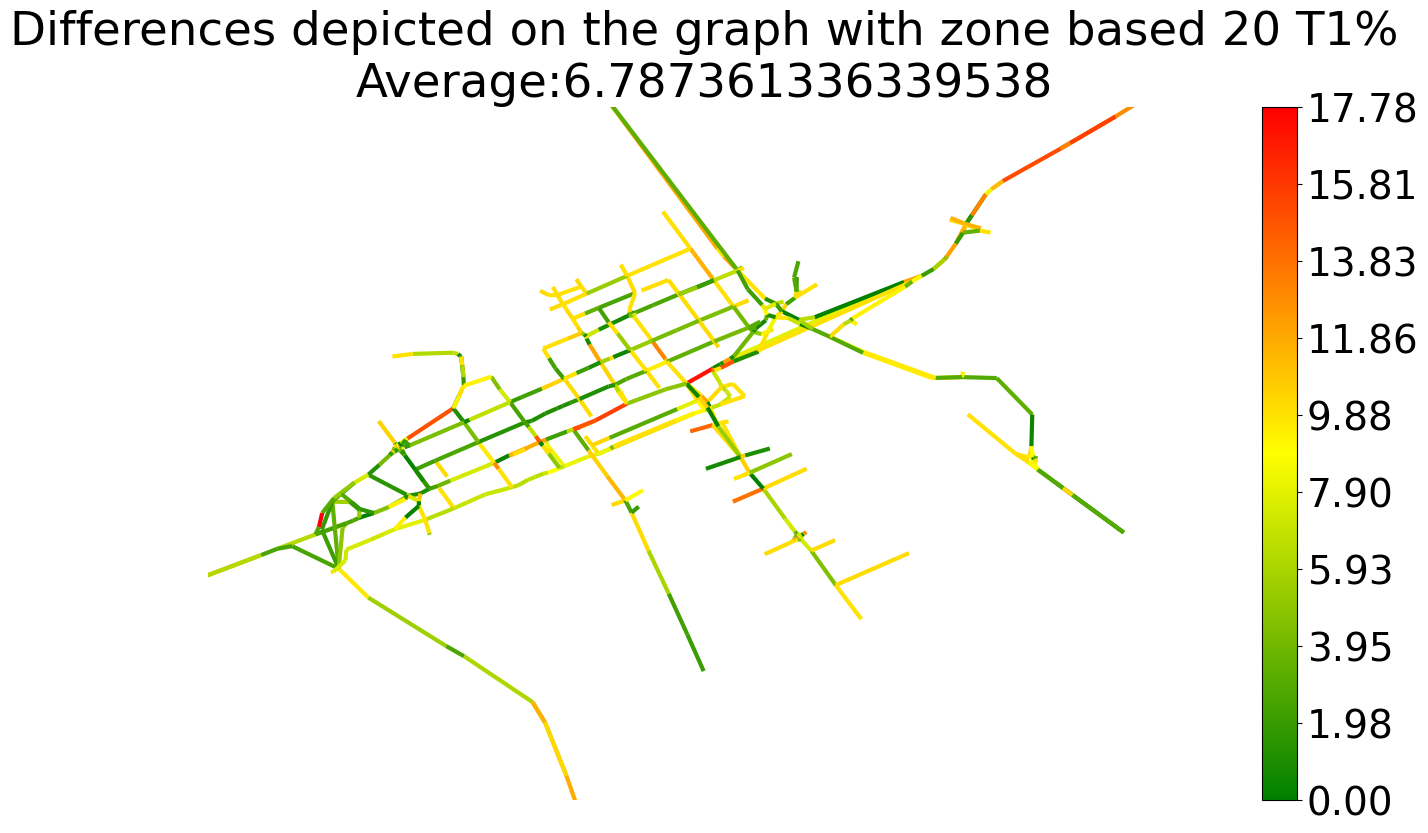

In [30]:
#maxdif_s_30 = plot_graph_weight_forecast(G1, output, edges_to_hide,prepared_training_data[2][2]," zone based 20% T1" )
maxdif_s_30_GEH = plot_graph_weight_forecast_GEH(G1, output, edges_to_hide,prepared_training_data[2][2], " zone based 20 T1%" )